Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the pregnancy file.

In [1]:
%matplotlib inline

import nsfg
preg = nsfg.ReadFemPreg()

/home/jsutker/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Select live births, then make a CDF of <tt>totalwgt_lb</tt>. 

In [2]:
import thinkstats2
cdf = thinkstats2.Cdf(preg[preg.nbrnaliv < 9]["totalwgt_lb"].dropna())

Display the CDF.

/home/jsutker/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


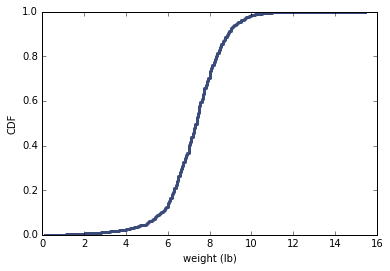

In [3]:
import thinkplot
thinkplot.Cdf(cdf, label='')
thinkplot.Show(xlabel='weight (lb)', ylabel='CDF')

Find out how much you weighed at birth, if you can, and compute CDF(x). 

In [4]:
cdf.Prob(8.3125)

0.7989599468909051

If you are a first child, look up your birthweight in the CDF of first children; otherwise use the CDF of other children.

In [5]:
cdf_notfirst = thinkstats2.Cdf(preg[preg.nbrnaliv < 9][preg.pregordr > 1]["totalwgt_lb"].dropna())
cdf_notfirst.Prob(8.3125)

/home/jsutker/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


0.78792650918635165

Compute the percentile rank of your birthweight

In [6]:
print "My percentile: %f" % cdf.PercentileRank(8.3125)

My percentile: 79.895995


Compute the median birth weight by looking up the value associated with p=0.5.

In [7]:
print "50th percentile weight: %f lb" % cdf.Percentile(50)

50th percentile weight: 7.375000 lb


Compute the interquartile range (IQR) by computing percentiles corresponding to 25 and 75. 

In [8]:
print "25th percentile weight: %f lb" % cdf.Percentile(25)
print "75th percentile weight: %f lb" % cdf.Percentile(75)

25th percentile weight: 6.500000 lb
75th percentile weight: 8.125000 lb


Make a random selection from <tt>cdf</tt>.

In [9]:
import numpy as np
print np.random.choice(preg[preg.nbrnaliv < 9]["totalwgt_lb"].dropna(), 1)[0]

7.5625


Draw a random sample from <tt>cdf</tt>.

In [10]:
print np.random.choice(preg[preg.nbrnaliv < 9]["totalwgt_lb"].dropna(), 100, replace=True)

[  6.125    8.       8.5625   8.5625   6.25     7.4375   7.8125   7.0625
   5.5      7.6875   8.375    7.5      5.8125   8.5625   9.       6.8125
   7.875    8.75     8.8125   6.5625   8.5      7.6875   7.6875   8.125
   6.       8.625    9.1875   7.3125   7.5      5.9375   8.5625   9.4375
   7.      10.5      8.75     7.5      7.5625   8.       7.5      7.1875
   7.1875   8.3125   5.9375   7.875    7.25     6.625    6.875    8.6875
   9.75     7.125    5.25     7.3125   6.1875   6.3125   8.8125   7.125
   6.375    8.9375   7.0625   8.3125   8.       8.5      8.8125   9.       6.75
   6.5625   2.8125   9.0625   7.3125   6.625    6.5625   8.125    9.375
   6.75     7.8125   4.375    7.375    6.875    8.4375   8.0625   6.875
   6.875    7.375    7.625    5.5625   7.1875   7.5      6.4375   6.6875
   7.875    8.       8.625    8.       7.4375   7.625    8.375    7.5625
   8.1875   7.3125   7.5   ]


Draw a random sample from <tt>cdf</tt>, then compute the percentile rank for each value, and plot the distribution of the percentile ranks.

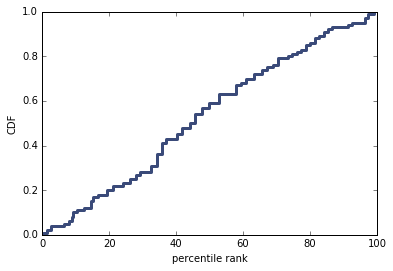

In [11]:
sample = np.random.choice(preg[preg.nbrnaliv < 9]["totalwgt_lb"].dropna(), 100, replace=True)
ranks = [cdf.PercentileRank(x) for x in sample]
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Show(xlabel='percentile rank', ylabel='CDF')

Generate 1000 random values using <tt>random.random()</tt> and plot their PMF.

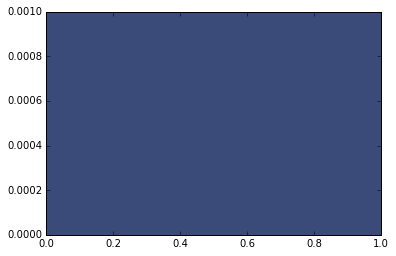

In [12]:
import random
rand_pmf = thinkstats2.Pmf([random.random() for i in range(1000)])
thinkplot.Pmf(rand_pmf)
thinkplot.Show()

Assuming that the PMF doesn't work very well, try plotting the CDF instead.

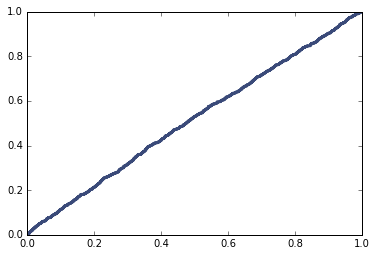

In [13]:
rand_cdf = thinkstats2.Cdf([random.random() for i in range(1000)], label='')
thinkplot.Cdf(rand_cdf)
thinkplot.Show()

### Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

### Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

### Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.